## Getting started with Jupyter Notebooks

Before we begin, let's cover a few basics about Jupyter (also known as iPython) notebooks. This is a markdown cell. Select a cell (a blue boundary should appear around the cell; you're in command mode) and press Enter on your keyboard to see it in editing mode (the cell boundary turns green in color). To switch back to command mode, press Esc. To run the cell, and go to the next cell, press Shift+Enter. If you want to run the cell without advancing to the next, press Ctrl+Enter.

To create a new cell below the current one, switch to command mode and then press the letter "b" on your keyboard. "a" will create a new cell above the current cell. "dd" will delete the current cell.

## Matplotlib: an introduction

If you attended any of the other workshops in this series, you probably heard me mention (and use!) the matplotlib library. It's one of the most commonly used plotting libraries in Python, and its **pyplot** module operates similarly to MATLAB (https://matplotlib.org/users/pyplot_tutorial.html).

Let's jump in!


In [1]:
## CODE CELL 1
# Importing libraries/modules we'll be using
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns

### Line and scatter plots

xmin: -5.0 xmax: 105.0


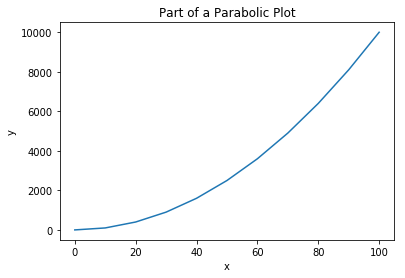

In [2]:
## CODE CELL 2
# Line plot

x = np.arange(0,101,10)    # creating an array from 0 to 100 in steps of 10
y = np.square(x)           # creating an array by element-wise squaring of array "x"

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Part of a Parabolic Plot')

plt.savefig('Figures/parabolic.png')    # saving plot to the Figures folder (or overwrite if file already in folder)

xmin, xmax = plt.xlim()    # get values for current x-axis limits
print('xmin:', xmin, 'xmax:', xmax)

*Note: If you run the above plot with an older distribution of Anaconda (with a pre-0.8 version of seaborn), you may find that plot gets rendered with a gray background/white gridlines; this is seaborn's default "darkgrid" style, and in earlier versions the style was automatically set upon import of the seaborn library (https://seaborn.pydata.org/tutorial/aesthetics.html). If this happens to you, move the seaborn import statement to the first coding cell under the Seaborn section of this notebook, clear all cell output (under the "cell" drop-down menu) and re-run the cells.*

What if we want to change the axes ranges?

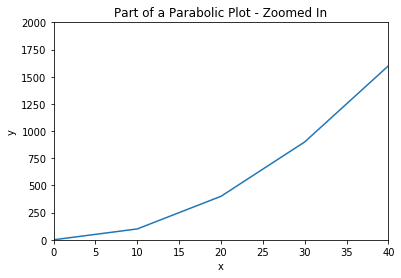

In [3]:
## CODE CELL 3
# Line plot again, with adjusted axes

x = np.arange(0,101,10)   
y = np.square(x)           

plt.plot(x, y)

plt.xlim(0, 40)    # setting x-axis limits
plt.ylim(0, 2000)  # setting y-axis limits

plt.xlabel('x')
plt.ylabel('y')
plt.title('Part of a Parabolic Plot - Zoomed In')

plt.show()

We can even flip an axis so that it shows values in decreasing order.

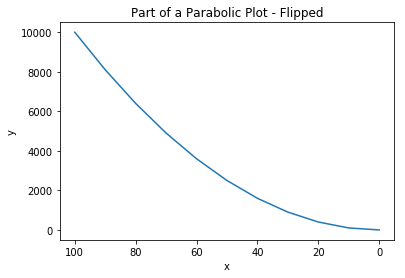

In [4]:
## CODE CELL 4
# Line plot again, with flipped x-axis

x = np.arange(0,101,10)   
y = np.square(x)           

plt.plot(x, y)

plt.xlim(105, -5)    # setting x-axis limits

plt.xlabel('x')
plt.ylabel('y')
plt.title('Part of a Parabolic Plot - Flipped')

plt.show()

Alright, let's say that we're happy with these x- and y- limits. What if we want to change the color and style of the plotted line?

`plt.plot()` allows you to specify formatting options for each x-y dataset you're plotting. Each formatting type is optional (not specifying just means default values will be used), but must be specified in a string in the following order: *color* + *marker style* + *line style*. See the following example:

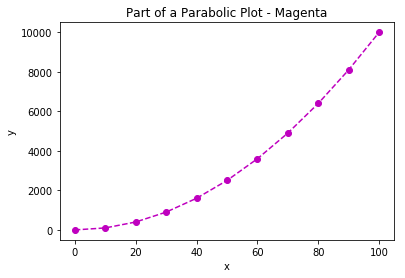

In [5]:
## CODE CELL 5
# Line plot again, this time with customized formatting

x = np.arange(0,101,10)   
y = np.square(x)           

plt.plot(x, y, 'mo--')    # color = magenta, marker = circle, line style = dashed
plt.xlabel('x')
plt.ylabel('y')
plt.title('Part of a Parabolic Plot - Magenta')

plt.show()

For all available color/marker/line style options, take a look at the "Notes" section in the `plt.plot()` documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot. You can also specify properties such as linewidth and markersize after the string formatter; check out the **kwargs properties listed at the same link.

`plt.plot()` can be used to create simple scatter plots as well - and if you don't need your data points to vary in marker size/color, the documentation recommends that you stick with `plot()`. However, there is a separate `plt.scatter()` function which does allow you to change how you display different data points.

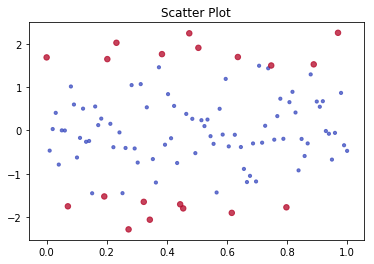

In [6]:
## CODE CELL 6
# An example using plt.scatter()

x = np.linspace(0,1,100)
np.random.seed(7)        # by specifying a seed #, we ensure the random #s generated below are the same each time the cell is run
y = np.random.randn(100)       # creating an array of 100 random normally-distributed numbers
outer = np.empty(100)    # initializing a 100 x 1 array; specific elements are assigned below
outer[np.abs(y) < 1.5] = 10    # set element = 10 if the absolute value of the corresponding element in y is < 1.5
outer[np.abs(y) >= 1.5] = 30   # set element = 30 if the absolute value of the corresponding element in y is >=1.5

# "s" corresponds to marker size, "c" to marker color, "cmap" to the colormap used to plot, and "alpha" to transparency
plt.scatter(x, y, s=outer, c=outer, cmap = cm.coolwarm, alpha = 0.75)

plt.title('Scatter Plot')

plt.show()

The documentation for `plt.scatter()` can be found here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html. Also, to look at the colormaps available, follow this link: https://matplotlib.org/examples/color/colormaps_reference.html

### Multiple plotting, subplots, and insets

What if you want to plot multiple data series? If you're calling `plt.plot()` on both of them, you can just add the x, y, and formatting options in the same call:

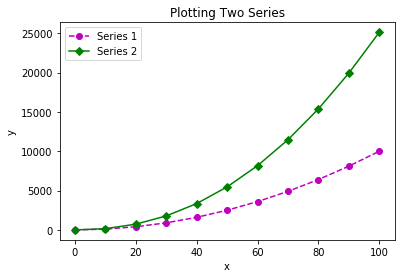

In [7]:
## CODE CELL 7
# Two series plotted as lines

x = np.arange(0,101,10)   
y1 = np.square(x)
y2 = np.power(x, 2.2)

plt.plot(x, y1, 'mo--', x, y2, 'gD-')    # color = magenta, marker = circle, line style = dashed
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Series 1','Series 2'])
plt.title('Plotting Two Series')

plt.show()

Alternative, you can just add function calls in sequence. You can repeat a call to the same function, or call a new plotting function, like so:

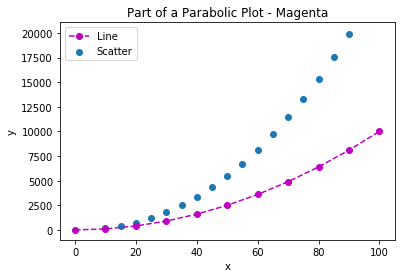

In [8]:
## CODE CELL 8
# Line plot and scatter plot

x1 = np.arange(0,101,10)
x2 = np.arange(10,91,5)
y1 = np.square(x1)  
y2 = np.power(x2, 2.2)

plt.plot(x1, y1, 'mo--')
plt.scatter(x2, y2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Line','Scatter'])
plt.title('Part of a Parabolic Plot - Magenta')

plt.show()

To create multiple subplots in a single figure, we can use `plt.subplot(nrows, ncols, index)` where *nrows* and *ncols* specifies the number of rows and columns of subplots you want to create, and *index* refers to the position of the exact subplot you are currently developing. The commas between each argument (*nrows*, etc.) are optional.

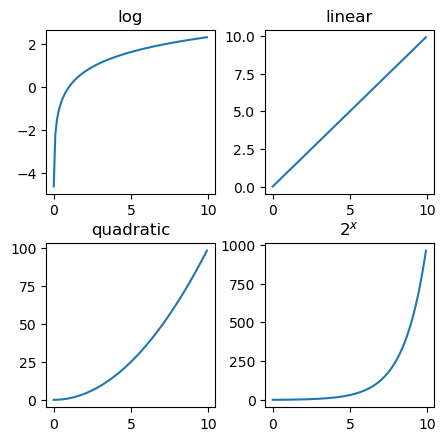

In [9]:
## CODE CELL 9
# A figure with four subplots

x1 = np.arange(0.01, 10, 0.1)    # x is the range of numbers from 0.01 to 10 with stepsize = 0.1
y1 = np.log(x1)
y2 = x1
y3 = np.square(x1)
y4 = np.power(2, x1)

plt.figure(figsize=(5,5), dpi=100)    # instantiating figure to be 5"x5", 100 dpi resolution

# Top-left
plt.subplot(2,2,1)
plt.plot(x1, y1)
plt.title('log')

# Top-right
plt.subplot(2,2,2)
plt.plot(x1, y2)
plt.title('linear')

# Bottom-left
plt.subplot(2,2,3)
plt.plot(x1, y3)
plt.title('quadratic')

# Bottom-right
plt.subplot(2,2,4)
plt.plot(x1,y4)
plt.title(r'$2^x$')    # formatting text with mathematical expressions: use TeX formatting

# Setting width of whitespace between subplots to be 0.3 x average axis width, height to be 0.3 x average axis height 
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

For more flexibility in subplot layout, we can use `plt.GridSpec()`. GridSpec allows you to refer to positions of subplots using standard Python zero-based indexing.

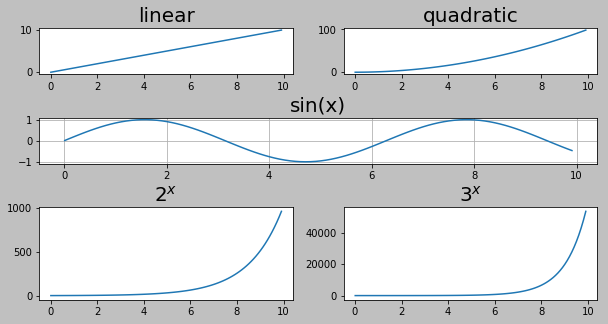

In [10]:
## CODE CELL 10
# Example using GridSpec
import matplotlib.gridspec as gridspec

x1 = np.arange(0.01, 10, 0.1)
y1 = x1
y2 = np.square(x1)
y3 = np.sin(x1)
y4 = np.power(2, x1)
y5 = np.power(3, x1)

# Creating a 10" x 5" figure with silver background
plt.figure(figsize=(10, 5), facecolor='silver')

# Creating a 3 x 2 layout of subplots; width_ratios and height_ratios correspond to the relative aspect ratios of each dimension
grid = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.7, width_ratios = [1, 1], height_ratios = [1, 1, 2])

# Top-left
plt.subplot(grid[0, 0])
plt.plot(x1, y1)
plt.title('linear', fontsize=20)

# Top-right
plt.subplot(grid[0, 1])
plt.plot(x1, y2)
plt.title('quadratic', fontsize=20)

# Middle
plt.subplot(grid[1, :])
plt.plot(x1, y3)
plt.title('sin(x)', fontsize=20)
plt.grid()

# Bottom-left
plt.subplot(grid[2, 0])
plt.plot(x1, y4)
plt.title(r'$2^x$', fontsize = 20)

# Bottom-right
plt.subplot(grid[2, 1])
plt.plot(x1, y5)
plt.title(r'$3^x$', fontsize = 20)

plt.show()

For inset plots, matplotlib (as of version 2.0.2) has an `axes_grid1` toolkit which allows users to create something like the following. Note that unlike before, we're explicitly instantiating the figure (whole image, including whitespace around main plot) and main axes (the main plot) in calling `plt.subplots()` with a default layout of 1 row x 1 column. For more on the differences between simply calling `plt.plot()`/`plt.subplot()` with vs. without explicitly getting the fig/ax components, check out this discussion by Jake VanderPlas: https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html#Two-Interfaces-for-the-Price-of-One.

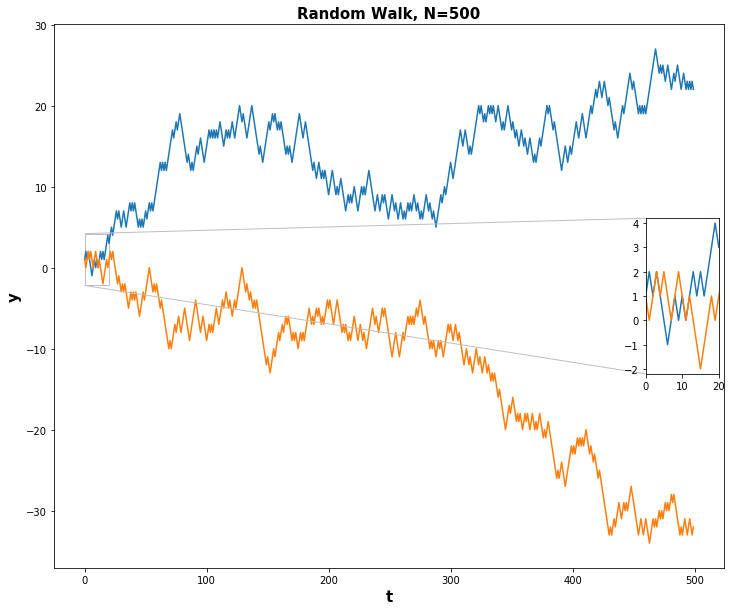

In [11]:
## CODE CELL 11

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Function that generates a random walk with N=500
def randomwalk(seed_num):
    init_pos = 0
    t = []
    y = []
    np.random.seed(seed_num)    # seeding random generator with specified number so the same figure appears when cell re-executed
    rn = np.random.randn(500)
    step = 0
    for k in range(500):
        t.append(k)
        if rn[k] > 0:
            step = +1
        else:
            step = -1
        init_pos += step
        y.append(init_pos)
    return np.array(t), np.array(y)

# Creating first random walk
t1, y1 = randomwalk(4)

# Creating second random walk
t2, y2 = randomwalk(7)

# Plot
fig, ax = plt.subplots(figsize = [12,10])              # creating 12" x 10" figure and an axes object (the bounded plot) inside 
ax.plot(t1, y1, t2, y2)                                # plotting in main axes
ax.set_xlabel('t', size=15, weight='bold')             # works like plt.xlabel() but can be individualized for each axes object
ax.set_ylabel('y', size=15, weight='bold')
ax.set_title('Random Walk, N=500', size=15, weight='bold')
ax_inset = zoomed_inset_axes(ax, zoom=3, loc=7)        # "zoom" sets scaling factor, "loc" sets location of inset
ax_inset.plot(t1, y1, t2, y2)                          # plotting in inset axes
ax_inset.set_xlim(0, 20)                               # setting lower and upper x-bounds for the inset
ax_inset.set_ylim(-2.2, 4.2)                           # setting lower and upper y-bounds for the inset
mark_inset(ax, ax_inset, loc1=2, loc2=3, ec='0.75')    # connecting main plot and inset plot via left corners using gray edgecolor

plt.show()

For more on the parameters that can be adjusted with `zoomed_inset_axes()`, check out the documentation at https://matplotlib.org/2.0.2/mpl_toolkits/axes_grid/api/inset_locator_api.html#mpl_toolkits.axes_grid1.inset_locator.zoomed_inset_axes.

For more on the parameters that can be adjusted with `mark_inset()`, check out the documentation at : https://matplotlib.org/2.0.2/mpl_toolkits/axes_grid/api/inset_locator_api.html#mpl_toolkits.axes_grid1.inset_locator.mark_inset.

### Bar plots and error bars

The main function for bar plots is `plt.bar()`. Let's look at a bar plot with two data series (effects of cell treatments at t1 vs t2).

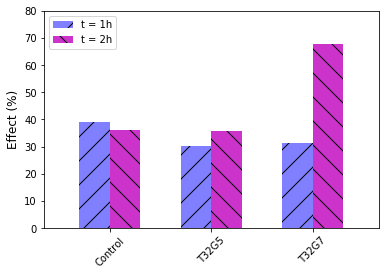

In [12]:
## CODE CELL 12
# Cell treatment experiment

treatments = ['Control', 'T32G5', 'T32G7']
effect_t1 = [39.03, 30.36, 31.37]
effect_t2 = [36.06, 35.87, 67.88]

x_pos = np.array([1, 3, 5])             # setting array which will control the spacing of bars between each treatment
barwidth = 0.6
plt.bar(x_pos, effect_t1, width=barwidth, color='b', alpha=0.5, hatch='/')    # plotting t1 series
plt.bar(x_pos + barwidth, effect_t2, width=barwidth, color='m', alpha=0.8, hatch='\\')    # plotting t2 series
plt.xticks(x_pos + 0.5*barwidth, treatments, rotation=45)    # setting position, labels, rotation (degrees) of x-tick labels
plt.xlim(0, 6.6)
plt.ylim(0, 80)
plt.ylabel('Effect (%)', size=12)
plt.legend(['t = 1h', 't = 2h'])

plt.show()

As you may have noticed, using `matplotlib.plt` allows us to customize the plot to a fine level of detail (there are a lot more formatting details that could be changed but weren't for the sake of brevity). However, sometimes we'd prefer the module to automatically arrange optimal settings (for example, we might not want to have to specify the spacing between multiple data series). That's where the seaborn package is preferable. We won't go through making bar plots in seaborn in this workshop, but if you're interested, see the documentation for `seaborn.barplot()`: https://seaborn.pydata.org/generated/seaborn.barplot.html.

We can add error bars to the above plot by specifying additional parameters when `plt.bar()` is called.

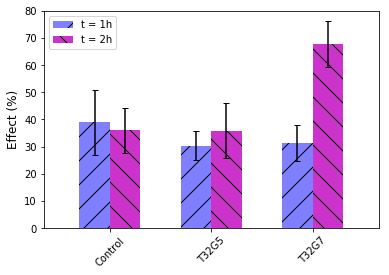

In [13]:
## CODE CELL 13
# Cell treatment experiment with error bars

treatments = ['Control', 'T32G5', 'T32G7']
effect_t1 = [39.03, 30.36, 31.37]
effect_t2 = [36.06, 35.87, 67.88]
sd_t1 = [11.99, 5.39, 6.51]
sd_t2 = [8.23, 10.16, 8.46]

x_pos = np.array([1, 3, 5])             
barwidth = 0.6

# Below, "yerr" defines the vertical error (+/-), capsize defines the length of the error bar caps 
plt.bar(x_pos, effect_t1, width=barwidth, yerr=sd_t1, capsize = 3, color='b', alpha=0.5, hatch='/')   
plt.bar(x_pos + barwidth, effect_t2, width=barwidth, yerr=sd_t2, capsize = 3, color='m', alpha=0.8, hatch='\\')   

plt.xticks(x_pos + 0.5*barwidth, treatments, rotation=45)  
plt.xlim(0, 6.6)
plt.ylim(0, 80)
plt.ylabel('Effect (%)', size=12)
plt.legend(['t = 1h', 't = 2h'])

plt.show()

More generally, error bars can be created with line/scatter plots using `plt.errorbar`.

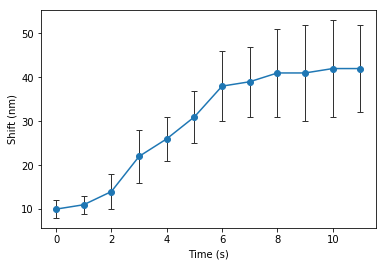

In [14]:
## CODE CELL 14
# Example using plt.errorbar()

time = np.arange(12)
shift = [10, 11, 14, 22, 26, 31, 38, 39, 41, 41, 42, 42]
std = [2, 2, 4, 6, 5, 6, 8, 8, 10, 11, 11, 10]

# Below, "fmt" allows formatting of the line and markers, "ecolor" = error bar color, "elinewidth" = error bar linewidth
plt.errorbar(time, shift, yerr=std, fmt='o-', ecolor='0.2', elinewidth=1, capsize=3)
plt.xlabel('Time (s)')
plt.ylabel('Shift (nm)')

plt.show()

For more on the parameters that can be adjusted with `plt.errorbar()`, check out the documentation at https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html.

### Box plots and histograms

Often, we'll be interested in the distribution of some dataset. Matplotlib's `plt.boxplot()` allows you to quickly construct a box-and-whiskers plot (a.k.a. box plot).

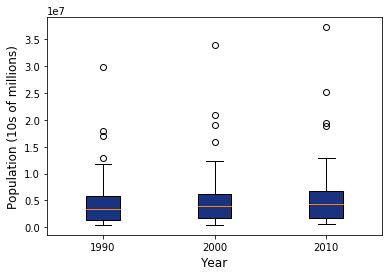

In [15]:
## CODE CELL 15
# Pulling in 1990-2010 U.S. census data, retrieved from https://en.wikipedia.org/wiki/List_of_U.S._states_by_historical_population

# Extracting lists of population counts in each of the 50 U.S. states in 1990, 2000, and 2010
df = pd.read_csv('UScensusdata_50states.txt', sep='\t', header=1)
pops_90 = df['1990'].str.replace(',', '').astype('int64').values.tolist()
pops_00 = df['2000'].str.replace(',', '').astype('int64').values.tolist()
pops_10 = df['2010'].str.replace(',', '').astype('int64').values.tolist()

# Creating boxplot with '1990', '2000', '2010' populations; setting patch_artist to True allows customization of plot style
bp = plt.boxplot([pops_90, pops_00, pops_10], patch_artist=True, labels=['1990', '2000', '2010'])

# boxplot() returns keys that can be set to different values; one such key is 'boxes' which corresponds to the main box body
for i in bp['boxes']:
    i.set_facecolor((0.1, 0.2, 0.5))

plt.xlabel('Year', size=12)
plt.ylabel('Population (10s of millions)', size=12)

plt.show()


As a disclaimer, pandas data frames do have their own boxplot method. Here, I wanted to show the generalized way to create boxplots using matplotlib (upon which `pd.DataFrame.boxplot()` is built).

Histograms can be created using `plt.hist()`:

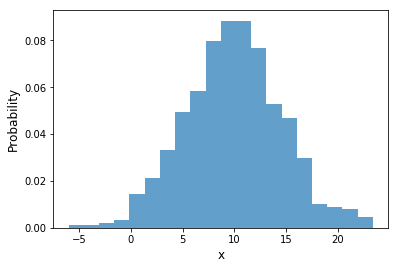

Values for each bin: [0.00135955 0.00135955 0.00203932 0.00339887 0.01427525 0.02107298
 0.03330891 0.04962348 0.05846053 0.07953352 0.08837057 0.08837057
 0.07681442 0.05302234 0.04690438 0.02991004 0.0101966  0.00883706
 0.00815728 0.00475842]
Edges of the bins: [-6.02200672 -4.55092881 -3.0798509  -1.60877298 -0.13769507  1.33338284
  2.80446076  4.27553867  5.74661658  7.2176945   8.68877241 10.15985032
 11.63092824 13.10200615 14.57308406 16.04416197 17.51523989 18.9863178
 20.45739571 21.92847363 23.39955154]


In [16]:
## CODE CELL 16
# Example distribution using sample data from normal distribution

np.random.seed(10)
distr = 10 + np.random.randn(1000)*5

# Creating a histogram from the distribution with 20 bins, counts normalized to get probability density
histogram = plt.hist(distr, bins=20, density=True, alpha=0.7)
n, bins, patches = histogram        # plt.hist() returns values for bin values, bin edges, and patches used to make histogram
plt.xlabel('x', size=12)
plt.ylabel('Probability', size=12)
plt.show()

print('Values for each bin:', n)
print('Edges of the bins:', bins)


### Logarithmic scaling and text annotation

For non-linear axes, change the "scale" parameter of `plt.xscale()` and/or `plt.yscale()` as needed.

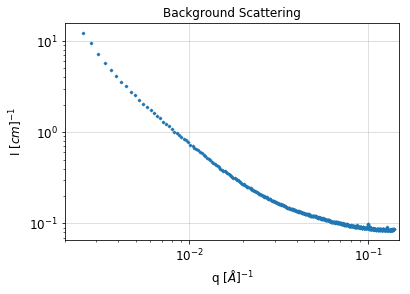

In [17]:
## CODE CELL 17
# Plotting background scattering data

# Reading in data 
q = []
i = []
with open('saxs_scatter.txt', 'r') as scatter:
    next(scatter)
    for line in scatter:
        line = line.split()
        x, y = float(line[0]), float(line[1])
        q.append(x)
        i.append(y)

# Plotting
plt.plot(q, i, 'D', markersize=2)

plt.xscale('log')
plt.xlabel(r'q $[\AA]^{-1}$', size=12)
plt.xlim(0.002, 0.15)
plt.xticks(fontsize=12)

plt.yscale('log')
plt.ylabel(r'I $[cm]^{-1}$', size=12)
plt.yticks(fontsize=12)

plt.title('Background Scattering')
plt.grid(alpha=0.5)
plt.show()

There are also options for logit and symlog (like log, but handles negative data) scaling. See the documentation for details: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xscale.html. You can also change the way the ticks are formatted using `matplotlib.ticker`: https://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker.

What if we wanted to add text inside the plot? Matplotlib's `plt.text()` and `plt.annotate()` allows you to do just that.

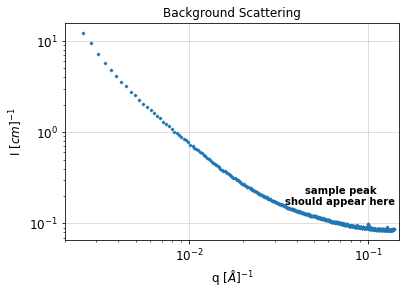

In [18]:
## CODE CELL 18
# Re-plotting the previous plot with text added

plt.plot(q, i, 'D', markersize=2)

plt.xscale('log')
plt.xlabel(r'q $[\AA]^{-1}$', size=12)
plt.xlim(0.002, 0.15)
plt.xticks(fontsize=12)

plt.yscale('log')
plt.ylabel(r'I $[cm]^{-1}$', size=12)
plt.yticks(fontsize=12)

plt.title('Background Scattering')
plt.grid(alpha=0.5)

# Adding text centered at q=0.07, I=0.16
plt.text(x=0.07, y=0.16, s="sample peak\nshould appear here", horizontalalignment='center', weight='bold')

plt.show()

To draw a pointer from the text to a specific point in the plot, use `plt.annotate()` and adjust the "arrowprops" parameter.

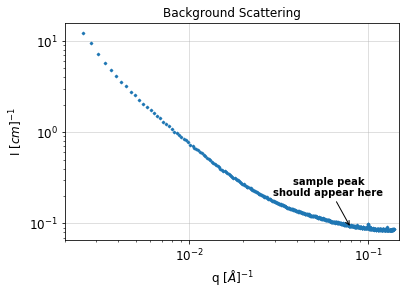

In [19]:
## CODE CELL 19
# Re-plotting the previous plot with annotation/arrow

plt.plot(q, i, 'D', markersize=2)

plt.xscale('log')
plt.xlabel(r'q $[\AA]^{-1}$', size=12)
plt.xlim(0.002, 0.15)
plt.xticks(fontsize=12)

plt.yscale('log')
plt.ylabel(r'I $[cm]^{-1}$', size=12)
plt.yticks(fontsize=12)

plt.title('Background Scattering')
plt.grid(alpha=0.5)

# Adding annotation; "xy" = coordinates of point to annotate, xytext = location of text
plt.annotate(s="sample peak\nshould appear here", xy=(0.08, 0.09), xytext=(0.06, 0.20), arrowprops=dict(arrowstyle="->"), 
             horizontalalignment='center', weight='bold')

plt.show()

There are a lot of options you can specify. Check out the documentation for `plt.annotate()` here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html?highlight=annotate#matplotlib-pyplot-annotate.

*The matplotlib gallery has an extensive collection of example visualizations along with corresponding code. We've only touched the surface today. You can find the gallery here: https://matplotlib.org/gallery.html.*

## Seaborn: a sneak peek

Seaborn is another library built on matplotlib which allows users to create more "attractive and informative statistical graphics" (https://seaborn.pydata.org/introduction.html).

The first thing we'll do is to set the default plotting style. This can be done using the blanket `sns.set()` method.

In [20]:
## CODE CELL 20

sns.set()

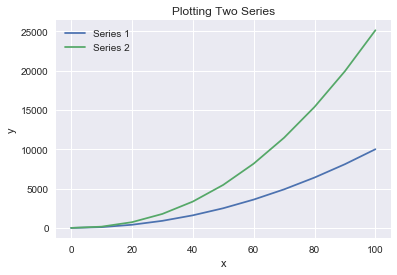

In [21]:
## CODE CELL 21
# Re-plotting one of our earlier plots

x = np.arange(0,101,10)   
y1 = np.square(x)
y2 = np.power(x, 2.2)

plt.plot(x, y1, x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Series 1','Series 2'])
plt.title('Plotting Two Series')

plt.show()

Using sns.set() sets the default style/theme ("darkgrid"), color palette, and context ("notebook"). There are several options for each, which can be adjusted using `sns.set_style()`, `sns.set_palette()`, `sns.set_context()`, respectively. 

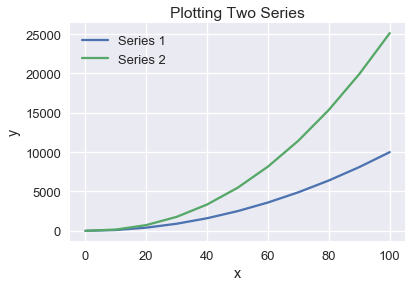

In [22]:
## CODE CELL 22
# Let's set the context as example

# Options: "notebook" (default), "paper", "talk", "poster"
sns.set_context("talk")

# Re-plot "Plotting Two Series"
plt.plot(x, y1, x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Series 1','Series 2'])
plt.title('Plotting Two Series')

plt.show()

Using `sns.set_style()`, `sns.set_palette()`, and `sns.set_context()`, will set the respective attribute for all plots going forward. If you want to specify the style, palette, or context for an individual plot, use `sns.axes_style()`, `sns.color_palette()`, or `sns.plotting_context()`. To learn more, check out these tutorial pages: https://seaborn.pydata.org/tutorial/aesthetics.html (style and context), https://seaborn.pydata.org/tutorial/color_palettes.html (palette).

### Example plots in seaborn

Let's look at some plots that seaborn makes easy. The first is `sns.pairplot()`, which plots pairwise relationships between attributes.

We truncated the data to five columns for easier visualization:

      RM   AGE     DIS  RAD    TAX
0  6.575  65.2  4.0900  1.0  296.0
1  6.421  78.9  4.9671  2.0  242.0
2  7.185  61.1  4.9671  2.0  242.0
3  6.998  45.8  6.0622  3.0  222.0
4  7.147  54.2  6.0622  3.0  222.0


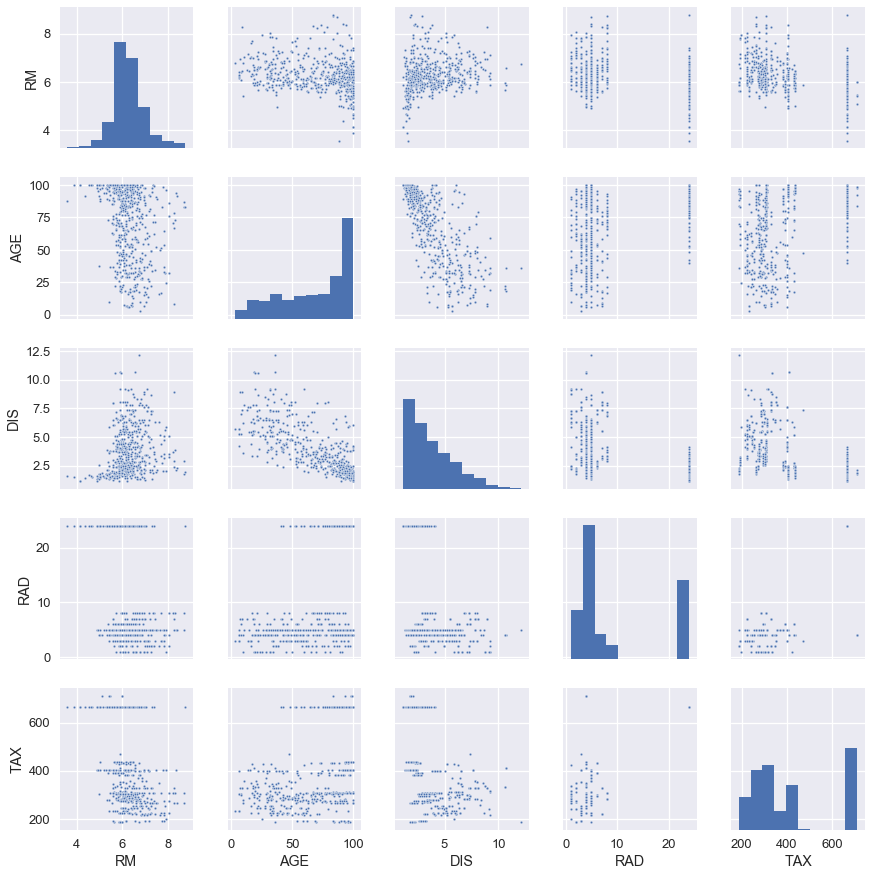

In [23]:
## CODE CELL 23
# Loading Boston dataset from scikit-learn; there are 13 housing-related attributes (not including the class, median value) 
# and 506 instances. For details about the dataset: http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

from sklearn.datasets import load_boston
boston = load_boston()
dfB = pd.DataFrame(boston.data[:, 5:10], columns=boston.feature_names[5:10])    # data needs to be in data frame format
print('We truncated the data to five columns for easier visualization:\n')
print(dfB.head())

# Pairplot; the keyword argument "s" refers to the marker size
sns.pairplot(dfB, plot_kws={'s': 7})

plt.show()

It looks like there could be a linear relationship between AGE and DIS. For a simple linear regression fit and plot, we can use `sns.regplot()`. By default, the 95% confidence interval will also be plotted.

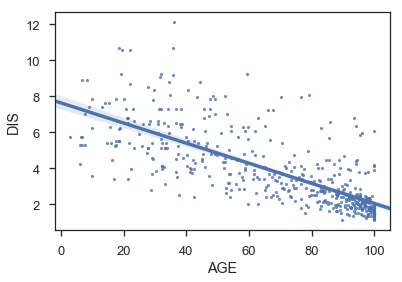

In [24]:
## CODE CELL 24
# AGE vs. DIS in Boston dataset

age = dfB['AGE']
dist = dfB['DIS']

# Plotting regression, with figure-specific style change to white/grid-less background
with sns.axes_style('ticks'):
    sns.regplot(x=age, y=dist, scatter_kws={'s':10})

plt.show()

We saw a histogram earlier using just matplotlib. Seaborn has a method called `sns.distplot()` which allows us to simultaneously plot a histogram and a kernel density estimation (KDE).

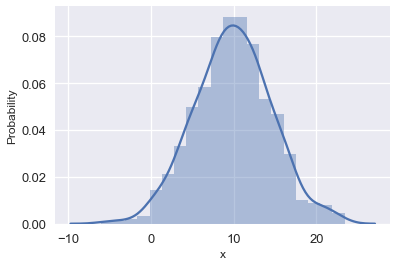

In [25]:
## CODE CELL 25
# Our distribution with sns.distplot()

np.random.seed(10)
distr = 10 + np.random.randn(1000)*5

# Creating a histogram and KDE from the distribution with 20 bins
sns.distplot(distr, bins=20)
plt.xlabel('x', size=12)
plt.ylabel('Probability', size=12)

plt.show()

Lastly, let's look at a seaborn favorite: the violin plot. It's essentially a KDE plotted over a box plot.

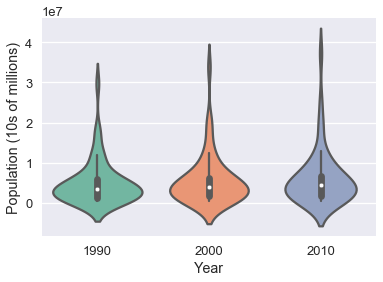

In [26]:
## CODE CELL 26
# Using our U.S. Census data again

with sns.color_palette('Set2'):
    vp = sns.violinplot(data=[pops_90, pops_00, pops_10])
vp.set_xticklabels(['1990','2000','2010'])
plt.xlabel('Year')
plt.ylabel('Population (10s of millions)')

plt.show()

*For more examples using seaborn, check out the gallery here: https://seaborn.pydata.org/examples/index.html.*

*References*:

The following materials were consulted during development of this notebook:

N.P. Rougier, *Matplotlib Tutorial*. https://www.labri.fr/perso/nrougier/teaching/matplotlib/.

The Matplotlib Development Team, *Pyplot Tutorial*. https://matplotlib.org/tutorials/introductory/pyplot.html.

J. VanderPlas, "Chapter 4 - Visualization with Matplotlib," *Python Data Science Handbook: Essential Tools for Working with Data*. O'Reilly Media, 2016. [Online] https://jakevdp.github.io/PythonDataScienceHandbook/index.html.

M. Waskom, *Seaborn Tutorial*. https://seaborn.pydata.org/tutorial.html#tutorial.
